**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [136]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
from scipy import stats
%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [135]:
%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):
    def __init__(self, n_neighbors, algorithm='brute'):
        self.neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        self.x_train = np.array(X).astype(float)
        self.y_train = np.array(y)
        self.y_label = np.unique(y)
        self.n_classes = np.shape(self.y_label)[0]
        self.y_dist = (self.x_train ** 2).sum(axis=1)
        if self.algorithm == 'kd_tree':
            self.tree = KDTree(self.x_train, leaf_size=60)

    def predict(self, X):
        if self.algorithm == 'brute':
            return self.predict_brute(X)
        elif self.algorithm == 'kd_tree':
            return self.predict_kdtree(X)

    def predict_proba(self, X):
        if self.algorithm == 'brute':
            return self.predict_proba_brute(X)
        elif self.algorithm == 'kd_tree':
            return self.predict_proba_kdtree(X)

    def predict_kdtree(self, X):
        X = X.astype(float)
        dist, ind = self.tree.query(X, k=self.neighbors)
        predict = self.y_train[ind].T
        return stats.mode(predict)[0].reshape(-1)

    def predict_brute(self, X):
        distance = self.distance(X)
        predict = self.y_train[np.argsort(distance)[:, :self.neighbors]]
        return stats.mode(predict.T)[0].reshape(-1)

    def predict_proba_kdtree(self, X):
        X = X.astype(float)
        dist, k_pred = self.tree.query(X, k=self.neighbors)
        predict = np.zeros((np.shape(X)[0], np.shape(self.y_label)[0]))
        for i in range(np.shape(k_pred)[0]):
            for j in k_pred[i]:
                predict[i][int(self.y_train[j])] += 1
        return predict / self.neighbors

    def predict_proba_brute(self, X):
        distance = self.distance(X)
        k_pred = np.argsort(distance)[:, :self.neighbors]
        predict = np.zeros((np.shape(X)[0], np.shape(self.y_label)[0]))
        for i in range(np.shape(k_pred)[0]):
            for j in k_pred[i]:
                predict[i][int(self.y_train[j])] += 1
        return predict / self.neighbors

    def distance(self, X):
        X = X.astype(float)
        x_dist = (X ** 2).sum(axis=1)
        xy_dist = X.dot(self.x_train.T)
        dist = -2 * xy_dist + self.y_dist + x_dist.reshape(-1, 1)
        return np.sqrt(dist)

    def score(self, X, y):
        y_pred = self.predict(X)
        return (y_pred == y).sum() / len(y)

**IRIS**

In [72]:
iris = datasets.load_iris()

In [73]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [74]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [75]:
%time clf.fit(X_train, y_train)

Wall time: 999 µs


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [76]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [77]:
%time clf.predict(X_test)

Wall time: 2 ms


array([1, 2, 1, 1, 0, 2, 2, 0, 0, 0, 1, 1, 2, 2, 0])

In [78]:
%time my_clf.predict(X_test)

Wall time: 996 µs


array([1, 2, 1, 1, 0, 2, 2, 0, 0, 0, 1, 1, 2, 2, 0])

In [143]:
%time clf.predict_proba(X_test)

Wall time: 1min 26s


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [80]:
%time my_clf.predict_proba(X_test)

Wall time: 997 µs


array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [81]:
clf.score(X_test, y_test)

1.0

In [82]:
my_clf.score(X_test, y_test)

1.0

Задание 3

Best neigbours number: 14


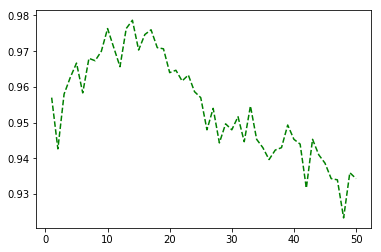

In [84]:
n_neighbours = 50
num_test = 200
scores = []

for i in range(1, n_neighbours + 1):
    testing_scores = []
    for j in range(num_test):
        X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                            test_size = 0.1, stratify = iris.target)
        my_clf = MyKNeighborsClassifier(n_neighbors = i)
        my_clf.fit(X_train, y_train)
        testing_scores.append(my_clf.score(X_test, y_test))
    scores.append(np.mean(testing_scores))

best_n = np.argmax(scores) + 1
print("Best neigbours number: %d" %best_n)

plt.plot(list(range(1, n_neighbours + 1)), scores, 'g--')
plt.show()

**MNIST**

In [85]:
mnist = fetch_mldata('MNIST original')

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [86]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, 
                                                    test_size=0.01, stratify=mnist.target)

In [87]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [88]:
%time clf.fit(X_train, y_train)

Wall time: 1min


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [89]:
%time my_clf.fit(X_train, y_train)

Wall time: 2.26 s


In [91]:
%time clf.predict(X_test)

Wall time: 1min 34s


array([9., 7., 1., 1., 0., 7., 7., 0., 2., 1., 0., 4., 1., 2., 5., 6., 1.,
       6., 8., 1., 4., 5., 3., 3., 7., 4., 4., 2., 9., 9., 1., 5., 5., 7.,
       0., 4., 8., 7., 8., 8., 6., 2., 7., 1., 3., 9., 4., 8., 1., 9., 0.,
       1., 0., 8., 3., 8., 6., 4., 6., 5., 1., 3., 0., 9., 1., 0., 2., 2.,
       7., 1., 1., 2., 7., 3., 2., 5., 5., 7., 0., 0., 0., 4., 2., 2., 9.,
       4., 1., 3., 7., 3., 0., 8., 0., 0., 4., 8., 5., 4., 2., 5., 3., 4.,
       8., 4., 5., 0., 6., 7., 6., 0., 4., 1., 9., 0., 1., 9., 9., 7., 3.,
       2., 5., 6., 3., 7., 4., 0., 8., 4., 1., 0., 2., 8., 8., 1., 3., 5.,
       1., 2., 7., 4., 1., 7., 5., 1., 0., 1., 1., 8., 1., 1., 1., 4., 3.,
       4., 9., 4., 4., 6., 0., 6., 0., 8., 3., 3., 0., 2., 8., 1., 4., 9.,
       1., 3., 8., 7., 1., 9., 0., 7., 2., 2., 3., 1., 6., 7., 1., 8., 4.,
       8., 6., 1., 1., 5., 4., 9., 8., 6., 0., 5., 5., 3., 2., 2., 9., 9.,
       6., 1., 4., 0., 5., 2., 0., 4., 7., 1., 0., 6., 2., 7., 4., 3., 1.,
       6., 4., 9., 6., 6.

In [90]:
%time my_clf.predict(X_test)

Wall time: 11.2 s


array([9., 7., 1., 1., 0., 7., 7., 0., 2., 1., 0., 4., 1., 2., 5., 6., 1.,
       6., 8., 1., 4., 5., 3., 3., 7., 4., 4., 2., 9., 9., 1., 5., 5., 7.,
       0., 4., 8., 7., 8., 8., 6., 2., 7., 1., 3., 9., 4., 8., 1., 9., 0.,
       1., 0., 8., 3., 8., 6., 4., 6., 5., 1., 3., 0., 9., 1., 0., 2., 2.,
       7., 1., 1., 2., 7., 3., 2., 5., 5., 7., 0., 0., 0., 4., 2., 2., 9.,
       4., 1., 3., 7., 3., 0., 8., 0., 0., 4., 8., 5., 4., 2., 5., 3., 4.,
       8., 4., 5., 0., 6., 7., 6., 0., 4., 1., 9., 0., 1., 9., 9., 7., 3.,
       2., 5., 6., 3., 7., 4., 0., 8., 4., 1., 0., 2., 8., 8., 1., 3., 5.,
       1., 2., 7., 4., 1., 7., 5., 1., 0., 1., 1., 8., 1., 1., 1., 4., 3.,
       4., 9., 4., 4., 6., 0., 6., 0., 8., 3., 3., 0., 2., 8., 1., 4., 9.,
       1., 3., 8., 7., 1., 9., 0., 7., 2., 2., 3., 1., 6., 7., 1., 8., 4.,
       8., 6., 1., 1., 5., 4., 9., 8., 6., 0., 5., 5., 3., 2., 2., 9., 9.,
       6., 1., 4., 0., 5., 2., 0., 4., 7., 1., 0., 6., 2., 7., 4., 3., 1.,
       6., 4., 9., 6., 6.

In [92]:
%time clf.predict_proba(X_test)

Wall time: 1min 36s


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [93]:
%time my_clf.predict_proba(X_test)

Wall time: 10.7 s


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [94]:
clf.score(X_test, y_test)

0.9785714285714285

In [95]:
my_clf.score(X_test, y_test)

0.9785714285714285

Задание 4

In [96]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [97]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [98]:
%time clf.fit(X_train, y_train)

Wall time: 54.1 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [137]:
%time my_clf.fit(X_train, y_train)

Wall time: 54.5 s


In [100]:
%time clf.predict(X_test)

Wall time: 1min 25s


array([0., 9., 4., 1., 1., 2., 7., 0., 5., 6., 7., 7., 2., 1., 3., 5., 5.,
       6., 2., 5., 6., 0., 7., 5., 0., 0., 5., 1., 5., 4., 7., 1., 7., 9.,
       2., 8., 1., 2., 5., 6., 6., 0., 6., 3., 0., 1., 7., 3., 8., 1., 9.,
       5., 2., 2., 9., 5., 3., 4., 3., 2., 8., 9., 2., 9., 6., 5., 4., 0.,
       4., 5., 1., 7., 7., 5., 3., 6., 7., 5., 8., 3., 5., 7., 9., 0., 9.,
       1., 3., 1., 4., 4., 2., 4., 2., 2., 9., 0., 4., 0., 2., 3., 2., 1.,
       5., 4., 1., 9., 1., 1., 3., 3., 7., 9., 3., 3., 2., 7., 1., 0., 0.,
       8., 0., 3., 7., 6., 9., 4., 5., 6., 3., 3., 5., 7., 0., 7., 4., 2.,
       5., 8., 7., 6., 4., 4., 6., 9., 9., 4., 8., 4., 5., 9., 0., 8., 6.,
       8., 9., 7., 2., 8., 4., 4., 1., 7., 8., 5., 9., 5., 1., 9., 7., 8.,
       8., 1., 2., 0., 8., 1., 3., 4., 9., 6., 7., 8., 7., 4., 3., 9., 8.,
       2., 0., 2., 9., 0., 6., 5., 9., 8., 3., 8., 3., 7., 8., 0., 8., 1.,
       2., 0., 4., 0., 7., 8., 3., 1., 4., 2., 4., 0., 8., 9., 9., 2., 3.,
       4., 5., 7., 6., 9.

In [138]:
%time my_clf.predict(X_test)

Wall time: 1min 13s


array([0., 9., 4., 1., 1., 2., 7., 0., 5., 6., 7., 7., 2., 1., 3., 5., 5.,
       6., 2., 5., 6., 0., 7., 5., 0., 0., 5., 1., 5., 4., 7., 1., 7., 9.,
       2., 8., 1., 2., 5., 6., 6., 0., 6., 3., 0., 1., 7., 3., 8., 1., 9.,
       5., 2., 2., 9., 5., 3., 4., 3., 2., 8., 9., 2., 9., 6., 5., 4., 0.,
       4., 5., 1., 7., 7., 5., 3., 6., 7., 5., 8., 3., 5., 7., 9., 0., 9.,
       1., 3., 1., 4., 4., 2., 4., 2., 2., 9., 0., 4., 0., 2., 3., 2., 1.,
       5., 4., 1., 9., 1., 1., 3., 3., 7., 9., 3., 3., 2., 7., 1., 0., 0.,
       8., 0., 3., 7., 6., 9., 4., 5., 6., 3., 3., 5., 7., 0., 7., 4., 2.,
       5., 8., 7., 6., 4., 4., 6., 9., 9., 4., 8., 4., 5., 9., 0., 8., 6.,
       8., 9., 7., 2., 8., 4., 4., 1., 7., 8., 5., 9., 5., 1., 9., 7., 8.,
       8., 1., 2., 0., 8., 1., 3., 4., 9., 6., 7., 8., 7., 4., 3., 9., 8.,
       2., 0., 2., 9., 0., 6., 5., 9., 8., 3., 8., 3., 7., 8., 0., 8., 1.,
       2., 0., 4., 0., 7., 8., 3., 1., 4., 2., 4., 0., 8., 9., 9., 2., 3.,
       4., 5., 7., 6., 9.

In [139]:
%time clf.predict_proba(X_test)

Wall time: 1min 19s


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [140]:
%time my_clf.predict_proba(X_test)

Wall time: 1min 3s


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [141]:
clf.score(X_test, y_test)

0.9785714285714285

In [142]:
my_clf.score(X_test, y_test)

0.9785714285714285

Задание 5

In [ ]:
# seaborn - библиотека для визуализации данных на базе matplotlib
# matplotlib - библиотека-визуализатор графиков/гистограмм/скаттер-плотов и т.д.
# train_test_split - деление данных на тестовую и трейновую часть
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - инструмент, используемый для последовательного преобразования данных
# StandardScaler (from sklearn.preprocessing import StandardScaler) - преобразование данных к стандартному нормальному распределнию(мат. ожидание 0, дисперсия 1)
# ClassifierMixin - базовый класс для всех классификаторов sklearn
# NeighborsBase - базовый класс для knn
# KNeighborsMixin - базовый класс для knn, содержащий поиск соседей
# SupervisedIntegerMixin - базовый класс, содержащий метод fit